# Evaluating the Effects of Alzheimer’s Disease Status and Drug Treatments on Training and Memory Performance in Mice: A Maze-Based Study

## Introduction
Mice are used in an experiment to test drugs that may prevent Alzheimer’s disease. Half the mice are transgenic – have been genetically modified to have Alzheimer’s disease. The other half of the mice are “wild type” – they have not been modified in any way, and are considered free of Alzheimer’s disease. The mice are assigned to treatment conditions and given one of four drugs, then tested on memory using a maze. The number of errors made in the maze is recorded for the Training Day and the Memory Day.

## Goal
1. Compare the training day errors based on drug treatments and AD status.
2. Compare the memory day errors based on drug treatments and AD status.


## Data Summary

In [84]:
import pandas as pd

df = pd.read_csv("/kaggle/input/alzheimers/Alzheimers Mice Data.csv")
grouped_df = df.groupby(['AD_Status', 'Treatment']).agg({
    'Training': lambda x: ', '.join(map(str, x)),
    'Memory': lambda x: ', '.join(map(str, x))
}).reset_index()
grouped_df

,AD_Status,Treatment,Training,Memory
0,1,1,"12, 15, 13, 12, 14","10, 12, 13, 10, 13"
1,1,2,"15, 17, 16, 17, 14","13, 13, 14, 15, 11"
2,1,3,"13, 14, 18, 15, 16","12, 11, 15, 10, 14"
3,1,4,"14, 13, 12, 14, 15","12, 11, 10, 13, 10"
4,2,1,"17, 16, 17, 14, 13","9, 8, 10, 8, 8"
5,2,2,"14, 18, 16, 17, 14","7, 10, 5, 9, 7"
6,2,3,"13, 14, 18, 15, 16","8, 7, 9, 8, 9"
7,2,4,"14, 13, 12, 14, 15","7, 9, 5, 8, 4"


In this study, we have four variables:
1. **Alzheimer’s Disease Status (Independent Variable):** There are two categories: 1 - Transgenic (Alzheimer's disease present) and 2 - Wild type (no Alzheimer's disease).
2. **Treatment (Independent Variable):** There are four treatment conditions based on the four types of drug administered, which will be represented form 1 to 4.
3. **Training (Dependent Variable):** The number of errors made by the mice in the maze during the training day.
4. **Memory (Dependent Variable):** The number of errors made by the mice in the maze during the memory day.

## Hypotheses
### **1)** In Evaluating the Difference in Training Performance
**Null Hypotheses:**
* $H_0$: Alzheimer’s disease status (transgenic or wild type) has no effect on the training performance of the mice in the maze.
* $H_0$: The type of drug administered (Treatment 1, 2, 3, or 4) has no effect on the training performance of the mice in the maze.
* $H_0$: There is no significant interaction between Alzheimer’s disease status and drug treatment on training performance. The effect of the drug does not depend on the AD status of the mice.

**Alternative Hypotheses:**
* $H_1$: Alzheimer’s disease status (transgenic or wild type) has an effect on the training performance of the mice in the maze.
* $H_1$: The type of drug administered (Treatment 1, 2, 3, or 4) has an effect on the training performance of the mice in the maze.
* $H_1$: There is a significant interaction between Alzheimer’s disease status and drug treatment on training performance. The effect of the drug depends on the AD status of the mice.
### **2)** In Evaluating the Difference in Memory Performance
**Null Hypotheses:**
* $H_0$: Alzheimer’s disease status (transgenic or wild type) has no effect on the memory performance of the mice in the maze.
* $H_0$: The type of drug administered (Treatment 1, 2, 3, or 4) has no effect on the memory performance of the mice in the maze.
* $H_0$: There is no significant interaction between Alzheimer’s disease status and drug treatment on memory performance. The effect of the drug does not depend on the AD status of the mice.

**Alternative Hypotheses:**
* $H_1$: Alzheimer’s disease status (transgenic or wild type) has an effect on the memory performance of the mice in the maze.
* $H_1$: The type of drug administered (Treatment 1, 2, 3, or 4) has an effect on the memory performance of the mice in the maze.
* $H_1$: There is a significant interaction between Alzheimer’s disease status and drug treatment on memory performance. The effect of the drug depends on the AD status of the mice.

## Methodology
**Statistical Treatment:** Two-Way ANOVA (Analysis of Variance)

**Rationale:**
1. **Purpose**
    * The study aims to evaluate the following:
        * Main Effects of Alzheimer’s Disease Status and Types of Drug Administered
            * Does Alzheimer’s disease status significantly affect training or memory performance of mice?
            * Do different types of drug administered significantly influence political interest?
        * Interaction Between Alzheimer’s Disease Status and Types of Drug Administered
            * Does the effect of the administered drug on training or memory performance in a maze vary depending on the Alzheimer’s disease status of the mice?
2. **Variables**
    * For each goal, there are three variables.
    * In evaluating the difference in training performance, the variables are:
        1. **Alzheimer’s Disease Status (Independent Variable):** There are two categories: 1 - Transgenic (Alzheimer's disease present) and 2 - Wild type (no Alzheimer's disease).
        2. **Treatment (Independent Variable):** There are four treatment conditions based on the four types of drug administered, which will be represented form 1 to 4.
        3. **Training (Dependent Variable):** The number of errors made by the mice in the maze during the training day.
    * In evaluating the difference in memory performance, the variables are:
        1. **Alzheimer’s Disease Status (Independent Variable):** There are two categories: 1 - Transgenic (Alzheimer's disease present) and 2 - Wild type (no Alzheimer's disease).
        2. **Treatment (Independent Variable):** There are four treatment conditions based on the four types of drug administered, which will be represented form 1 to 4.
        3. **Memory (Dependent Variable):** The number of errors made by the mice in the maze during the memory day.

# Assumption Validation
#### 1. A continuous dependent variable (each for evaluating the differences in training and memory performance)

In [86]:
# Check if the 'Training' is numeric
if pd.api.types.is_numeric_dtype(df['Training']):
    print("The 'Training' column is continuous.")
else:
    print("The 'Training' column is not continuous.")

# Check if the 'Memory' is numeric
if pd.api.types.is_numeric_dtype(df['Training']):
    print("The 'AD_Status' column is continuous.")
else:
    print("The 'AD_Status' column is not continuous.")

The 'Training' column is continuous.
The 'AD_Status' column is continuous.


#### 2. Two independent variables with at least 2 levels

In [87]:
ad_status_comma = ', '.join(map(str, df['AD_Status'].unique()))
treatment_comma = ', '.join(map(str, df['Treatment'].unique()))

print(f"Alzheimer’s Disease Status: {ad_status_comma}")
print(f"Treatment Types: {treatment_comma}")

Alzheimer’s Disease Status: 1, 2
Treatment Types: 1, 2, 3, 4


#### 3. Independence of observation
* Based on the given data it was assumed to have independent observations. Thus, the assumption for independent observations are satisfied.

#### 4. No significant outliers

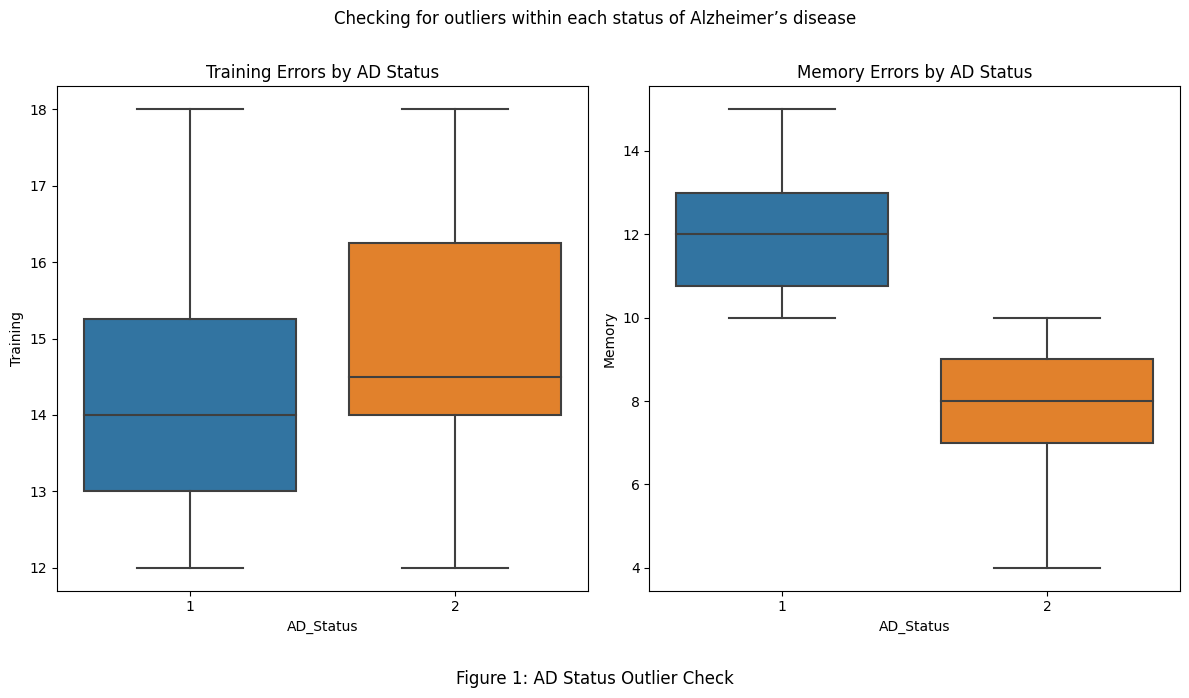

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for Training and Memory errors, grouped by AD_Status
plt.figure(figsize=(12, 6))

# Boxplot for Training errors grouped by AD Status
plt.subplot(1, 2, 1)
sns.boxplot(x='AD_Status', y='Training', data=df)
plt.title('Training Errors by AD Status')

# Boxplot for Memory errors grouped by AD Status
plt.subplot(1, 2, 2)
sns.boxplot(x='AD_Status', y='Memory', data=df)
plt.title('Memory Errors by AD Status')

plt.figtext(0.5, 1.05, 'Checking for outliers within each status of Alzheimer’s disease', ha='center', va='center', fontsize=12)
plt.figtext(0.5, -0.05, 'Figure 1: AD Status Outlier Check', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

As shown in Figure 1 above, there are no significant outliers for each Alzheimer's disease status in both Training Errors and Memory Errors.

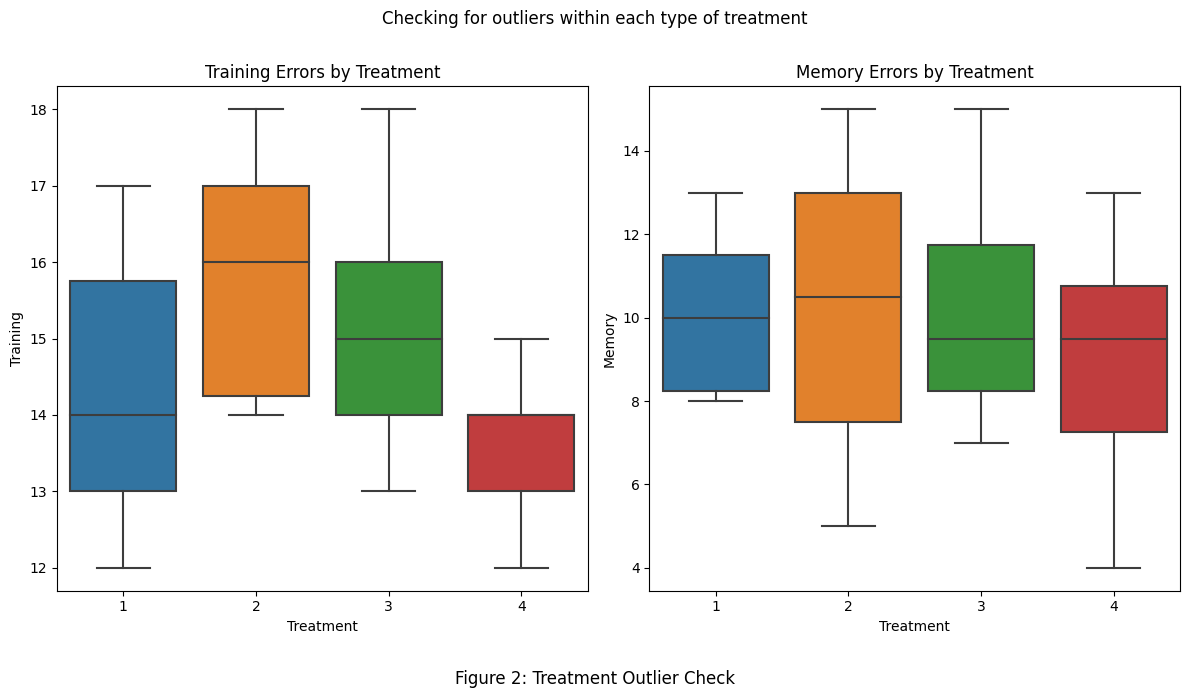

In [89]:
# Create a boxplot for Training and Memory errors, grouped by Treatment
plt.figure(figsize=(12, 6))

# Boxplot for Training errors grouped by AD Status
plt.subplot(1, 2, 1)
sns.boxplot(x='Treatment', y='Training', data=df)
plt.title('Training Errors by Treatment')

# Boxplot for Memory errors grouped by Treatment 
plt.subplot(1, 2, 2)
sns.boxplot(x='Treatment', y='Memory', data=df)
plt.title('Memory Errors by Treatment')

plt.figtext(0.5, 1.05, 'Checking for outliers within each type of treatment', ha='center', va='center', fontsize=12)
plt.figtext(0.5, -0.05, 'Figure 2: Treatment Outlier Check', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

As shown in Figure 2 above, there are no significant outliers for each treatment type in both Training Errors and Memory Errors.

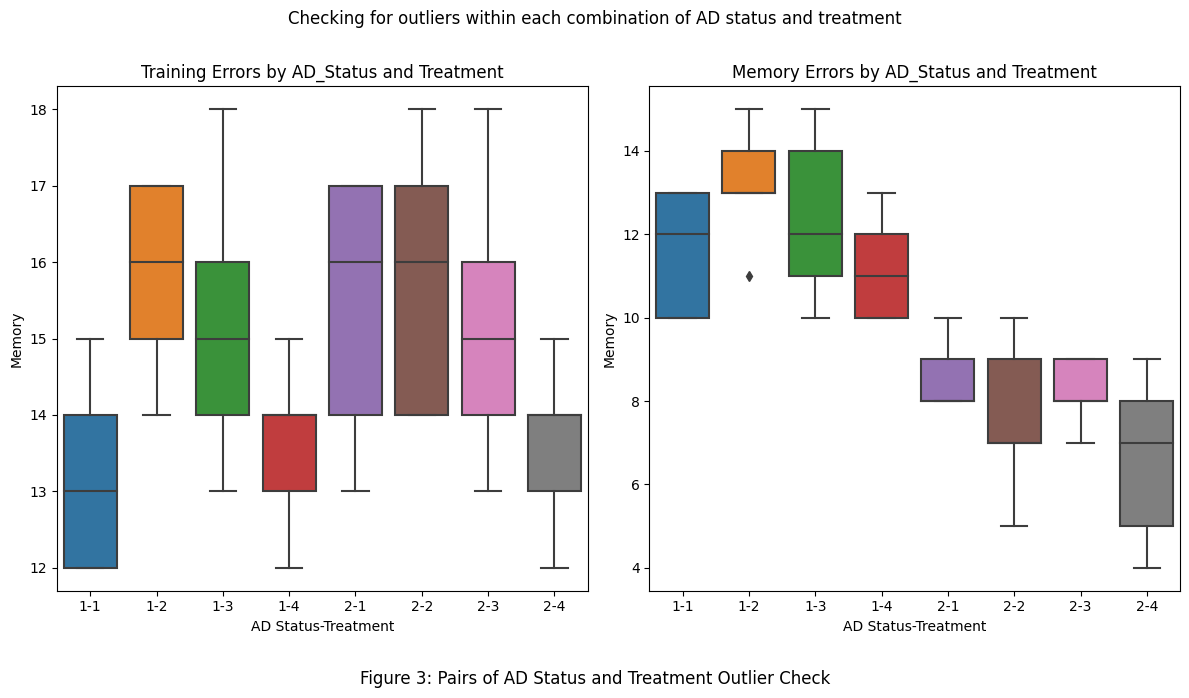

In [90]:
# Create a combined 'AD_Status_Treatment' column for plotting
df['AD_Status_Treatment'] = df['AD_Status'].astype(str) + '-' + df['Treatment'].astype(str)

# Plot all boxplots in one chart
plt.figure(figsize=(12, 6))

# Boxplot for Training errors grouped by pairs of AD Status and Treatment
plt.subplot(1, 2, 1)
sns.boxplot(x='AD_Status_Treatment', y='Training', data=df)
plt.title('Training Errors by AD_Status and Treatment')
plt.xlabel('AD Status-Treatment')
plt.ylabel('Memory')

# Boxplot for Memory errors grouped by pairs of AD Status and Treatment
plt.subplot(1, 2, 2)
sns.boxplot(x='AD_Status_Treatment', y='Memory', data=df)
plt.title('Memory Errors by AD_Status and Treatment')
plt.xlabel('AD Status-Treatment')
plt.ylabel('Memory')

plt.figtext(0.5, 1.05, 'Checking for outliers within each combination of AD status and treatment', ha='center', va='center', fontsize=12)
plt.figtext(0.5, -0.05, 'Figure 3: Pairs of AD Status and Treatment Outlier Check', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

As shown in Figure 3 above, all groups show no significant outliers for both Training and Memory Errors, except for the '1-2' pair in Memory Errors. To confirm whether this pair truly has a significant outlier, we will apply the interquartile range (IQR) method.

In [92]:
import numpy as np

# Data
memory_pair_1_2 = df[(df['AD_Status'] == 1) & (df['Treatment'] == 2)]['Memory'].tolist()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(memory_pair_1_2, 25)
Q3 = np.percentile(memory_pair_1_2, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in memory_pair_1_2 if x < lower_bound or x > upper_bound]

# Check if there are outliers and print the result
if outliers:
    print(f"There are outliers: {outliers}")
    print(f"Upper bound: {upper_bound}")
    print(f"Lower bound: {lower_bound}")
else:
    print("There are no outliers.")

There are outliers: [11]
Upper bound: 15.5
Lower bound: 11.5


The code indicates that 11 is an outlier, but it is close to the lower bound and is not considered a significant outlier. Therefore, there are no significant outliers in the overall data.

#### 5. Approximately normal distribution

In [107]:
# List all unique combinations of Diet and Exercise
combinations = df.groupby(['AD_Status', 'Treatment'])

# Create a list to store results
results = []

# Perform Shapiro-Wilk test for each combination
for combination, group_data in combinations:
    stat, p_value = stats.shapiro(group_data['Training'])
    results.append({
        'Group': 'Training',
        'Diet': combination[0],
        'Exercise': combination[1],
        'Statistic': stat,
        'p-value': p_value
    })

for combination, group_data in combinations:
    stat, p_value = stats.shapiro(group_data['Memory'])
    results.append({
        'Group': 'Memory',
        'Diet': combination[0],
        'Exercise': combination[1],
        'Statistic': stat,
        'p-value': p_value
    })

# Convert results to a DataFrame for better presentation
normality_results_df = pd.DataFrame(results)

# Display the results
normality_results_df

,Group,Diet,Exercise,Statistic,p-value
0,Training,1,1,0.902020,0.421150
1,Training,1,2,0.902020,0.421150
2,Training,1,3,0.978716,0.927636
3,Training,1,4,0.960859,0.813952
4,Training,2,1,0.866836,0.253846
5,Training,2,2,0.893924,0.377222
6,Training,2,3,0.978716,0.927636
7,Training,2,4,0.960859,0.813952
8,Memory,1,1,0.802990,0.085693
9,Memory,1,2,0.955627,0.777253


Since the violation is in only one group and the majority of the data appears to meet the assumption of normality, we can still proceed with the Two-Way ANOVA.

#### 6. Homogeinity of Variances

In [106]:
# Initialize results list
results = []

# Perform Levene's test for Training and Memory
for variable in ['Training', 'Memory']:
    # Group data by combinations of AD_Status and Treatment
    grouped_data = [group[variable].values for _, group in df.groupby(['AD_Status', 'Treatment'])]

    # Perform Levene's test
    stat, p_value = stats.levene(*grouped_data)

    # Append the results
    results.append({
        'Group': variable,
        'Statistic': stat,
        'p-value': p_value
    })

# Convert results to a DataFrame for display
homogeneity_results_df = pd.DataFrame(results)

# Display the table
homogeneity_results_df

,Group,Statistic,p-value
0,Training,0.434608,0.873051
1,Memory,0.827458,0.572220


Since both p-value are greater than 0.05, we fail to reject the null hypothesis that variances are likely equal. Hence, the variances appear to be equal. Therefore, with all assumptions validated, we can proceed with the Two-Way ANOVA.

## Analysis
#### Descriptive Statistics of Data

In [114]:
summary = df.describe()
summary

,AD_Status,Treatment,Training,Memory
count,40.00000,40.000000,40.000000,40.0000
mean,1.50000,2.500000,14.725000,9.9250
std,0.50637,1.132277,1.753933,2.7399
min,1.00000,1.000000,12.000000,4.0000
25%,1.00000,1.750000,13.750000,8.0000
50%,1.50000,2.500000,14.000000,10.0000
75%,2.00000,3.250000,16.000000,12.0000
max,2.00000,4.000000,18.000000,15.0000


In [116]:
# Group by AD_Status and Treatment
grouped_summary = df.groupby(['AD_Status', 'Treatment']).describe()

# Print the result
grouped_summary

Training                                                \
                       count  mean       std   min   25%   50%   75%   max   
AD_Status Treatment                                                          
1         1              5.0  13.2  1.303840  12.0  12.0  13.0  14.0  15.0   
          2              5.0  15.8  1.303840  14.0  15.0  16.0  17.0  17.0   
          3              5.0  15.2  1.923538  13.0  14.0  15.0  16.0  18.0   
          4              5.0  13.6  1.140175  12.0  13.0  14.0  14.0  15.0   
2         1              5.0  15.4  1.816590  13.0  14.0  16.0  17.0  17.0   
          2              5.0  15.8  1.788854  14.0  14.0  16.0  17.0  18.0   
          3              5.0  15.2  1.923538  13.0  14.0  15.0  16.0  18.0   
          4              5.0  13.6  1.140175  12.0  13.0  14.0  14.0  15.0   

                    Memory                                                
                     count  mean       std   min   25%   50%   75%   max  
AD_Status Treatment                                                       
1         1            5.0  11.6  1.516575  10.0  10.0  12.0  13.0  13.0  
          2            5.0  13.2  1.483240  11.0  13.0  13.0  14.0  15.0  
          3            5.0  12.4  2.073644  10.0  11.0  12.0  14.0  15.0  
          4            5.0  11.2  1.303840  10.0  10.0  11.0  12.0  13.0  
2         1            5.0   8.6  0.894427   8.0   8.0   8.0   9.0  10.0  
          2            5.0   7.6  1.949359   5.0   7.0   7.0   9.0  10.0  
          3            5.0   8.2  0.836660   7.0   8.0   8.0   9.0   9.0  
          4            5.0   6.6  2.073644   4.0   5.0   7.0   8.0   9.0

#### Applying Two-Way ANOVA (Training Errors)

In [121]:
training_df = df.drop(columns=['Memory', 'AD_Status_Treatment'])
training_df

# Perform Two-Way ANOVA
model = ols('Training ~ C(AD_Status) + C(Treatment) + C(AD_Status):C(Treatment)', data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model)

# Display the results
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(AD_Status),1.0,3.025,3.0250,1.216080,0.278356
C(Treatment),3.0,28.275,9.4250,3.788945,0.019678
C(AD_Status):C(Treatment),3.0,9.075,3.0250,1.216080,0.319771
Residual,32.0,79.600,2.4875,NaN,NaN


#### Interpretations for Training Errors:
1. **Main Effect of Alzheimer’s Disease Status:** The p-value for the Alzheimer’s Disease Status factor is 0.278356, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is **no statistically significant main effect of having Alzheimer’s disease on the mice's training errors in the maze**.
2. **Main Effect of Treatment:** The p-value for the Alzheimer’s Disease Status factor is 0.019678, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that there is **a statistically significant main effect of the different types of treatment on the mice's training errors in the maze.**
3. **Interaction Effect Between Alzheimer’s Disease Status and Treatment:** The interaction p-value is 0.319771, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is **no statistically significant interaction between the Alzheimer’s disease status of mice and different types of treatment administered to them**.

#### Applying Two-Way ANOVA (Training Errors)

In [122]:
training_df = df.drop(columns=['Training', 'AD_Status_Treatment'])
training_df

# Perform Two-Way ANOVA
model = ols('Memory ~ C(AD_Status) + C(Treatment) + C(AD_Status):C(Treatment)', data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model)

# Display the results
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(AD_Status),1.0,189.225,189.225000,75.313433,6.449421e-10
C(Treatment),3.0,14.475,4.825000,1.920398,1.461176e-01
C(AD_Status):C(Treatment),3.0,8.675,2.891667,1.150912,3.436263e-01
Residual,32.0,80.400,2.512500,NaN,NaN


#### Interpretations for Memory Errors:
1. **Main Effect of Alzheimer’s Disease Status:** The p-value for the Alzheimer’s Disease Status factor is $6.4494 × 10^{-10}$, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that there is **a statistically significant main effect of having Alzheimer’s disease on the mice's memory errors in the maze.**
2. **Main Effect of Treatment:** The p-value for the Alzheimer’s Disease Status factor is 0.1461, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is **no statistically significant main effect of the different types of treatment on the mice's memory errors in the maze.**
3. **Interaction Effect Between Alzheimer’s Disease Status and Treatment:** The interaction p-value is 0.3436, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is **no statistically significant interaction between the Alzheimer’s disease status of mice and different types of treatment administered to them.**